#  Internship Project: Credit Risk Prediction  
**Organization:** Developers Hub Corporation  
**Intern:** Ashna Imtiaz  
**Domain:** Data Science and Analytics  
**Task 2:** Credit Risk Prediction  



## Objective  
Predict whether a loan applicant is likely to default on a loan using machine learning models, while addressing issues like class imbalance and model overfitting.

---

##  Tools & Libraries Used  
- Python  
- Pandas, NumPy  
- Scikit-learn  
- Matplotlib, Seaborn  

---

##  Models Implemented  
- **Logistic Regression**
- **Decision Tree Classifier**
---

# import the required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn .tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
!pip install kaggle -q

In [ ]:
# move the kaggle.json to the Right Directory and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# download the zipped representation of the book dataset
!kaggle datasets download -d yasserh/loan-default-dataset


Dataset URL: https://www.kaggle.com/datasets/yasserh/loan-default-dataset
License(s): CC0-1.0
  0% 0.00/4.89M [00:00<?, ?B/s]
100% 4.89M/4.89M [00:00<00:00, 556MB/s]


In [ ]:
import zipfile

# Unzip file
with zipfile.ZipFile("loan-default-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("loan_default_data")

# Load into pandas
import pandas as pd
df = pd.read_csv("/content/loan_default_data/Loan_Default.csv")


In [ ]:
df.head(2)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN


In [ ]:
# check missing values
df.isnull().sum()[df.isnull().any()]

,0
loan_limit,3344
approv_in_adv,908
loan_purpose,134
rate_of_interest,36439
Interest_rate_spread,36639
Upfront_charges,39642
term,41
Neg_ammortization,121
property_value,15098
income,9150


In [ ]:
df.shape

(148670, 34)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,148670.0,99224.500000,42917.476598,24890.000000,62057.25000,99224.50000,136391.750000,1.735590e+05
year,148670.0,2019.000000,0.000000,2019.000000,2019.00000,2019.00000,2019.000000,2.019000e+03
loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3.576500e+06
rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.000000e+00
Interest_rate_spread,112031.0,0.441656,0.513043,-3.638000,0.07600,0.39040,0.775400,3.357000e+00
Upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,6.000000e+04
term,148629.0,335.136582,58.409084,96.000000,360.00000,360.00000,360.000000,3.600000e+02
property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,1.650800e+07
income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,5.785800e+05
Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,9.000000e+02


In [ ]:
df = df.drop_duplicates()

<Axes: >

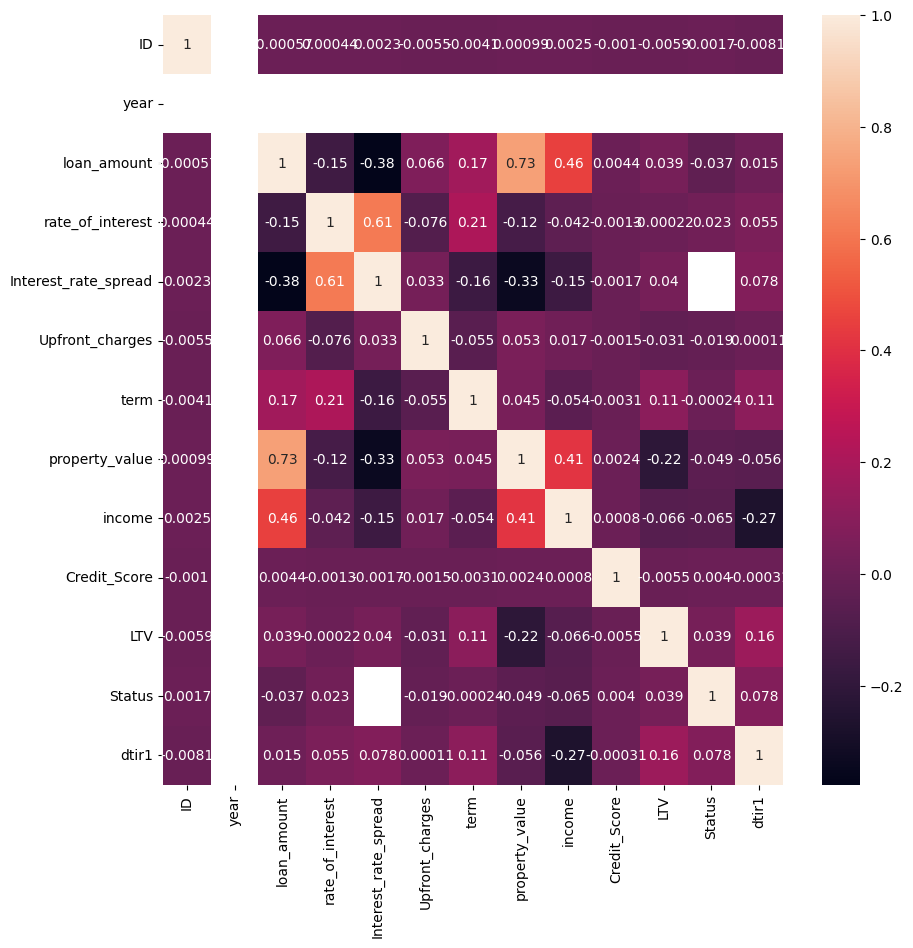

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)

In [ ]:


df['default'] = df['Status']
df.drop(columns=['Status'], inplace=True)


In [ ]:
df.select_dtypes(include='number').corr()['default']


,default
ID,0.001703
year,NaN
loan_amount,-0.036825
rate_of_interest,0.022957
Interest_rate_spread,NaN
Upfront_charges,-0.019138
term,-0.000240
property_value,-0.048864
income,-0.065119
Credit_Score,0.004004


In [ ]:
df['loan_purpose'].unique()

array(['p1', 'p4', 'p3', 'p2', nan], dtype=object)

In [ ]:
selected_features = [
    'income',               # Fundamental for repayment capacity
    'dtir1',                # Debt-to-income ratio, critical financial burden indicator
    'loan_amount',          # The principal amount, core loan characteristic
    'rate_of_interest',     # Lender's assessment of risk, impacts affordability
    'Credit_Worthiness',    # Direct measure of applicant's risk (or 'Credit_Score' if that's the actual column name with scores)
    'LTV',                  # Loan-to-Value ratio, critical for secured loans
    'loan_purpose',         # The reason for the loan indicates risk context
    'term',                 # Repayment period, influences long-term risk exposure
    'age',                  # Applicant's age, often correlated with financial stability
    'loan_type'             # Different loan types have different inherent risks
]

In [ ]:
# For this example, I'll use 'Credit_Worthiness' as per your list, assuming it's the score.
if 'Credit_Score' in df.columns and 'Credit_Worthiness' not in df.columns:
    selected_features = [f.replace('Credit_Worthiness', 'Credit_Score') for f in selected_features]

In [ ]:
# Add your target variable to the list for training/prediction
target_variable = 'default'
final_columns_for_model = selected_features + [target_variable]

In [ ]:
# Create a new DataFrame with only the selected features and the target variable
df_selected = df[final_columns_for_model]



In [ ]:
# Display the columns of the new DataFrame
print("Selected features for your model:")
print(df_selected.columns.tolist())

Selected features for your model:
['income', 'dtir1', 'loan_amount', 'rate_of_interest', 'Credit_Worthiness', 'LTV', 'loan_purpose', 'term', 'age', 'loan_type', 'default']


In [ ]:
len(df_selected.columns.tolist())

11

In [ ]:
missing = df_selected.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])


rate_of_interest    36439
dtir1               24121
LTV                 15098
income               9150
age                   200
loan_purpose          134
term                   41
dtype: int64


In [ ]:
df[['rate_of_interest', 'dtir1', 'LTV', 'income']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rate_of_interest  112231 non-null  float64
 1   dtir1             124549 non-null  float64
 2   LTV               133572 non-null  float64
 3   income            139520 non-null  float64
dtypes: float64(4)
memory usage: 4.5 MB


In [ ]:
# --- STEP 2: Define columns by their missing value strategy ---

# Numerical columns with a high number of missing values (will add missing indicators)
high_missing_numerical_cols = ['rate_of_interest', 'dtir1', 'LTV', 'income']

# Numerical columns with a low number of missing values (median imputation only)
low_missing_numerical_cols = ['term']

# Categorical columns with missing values (mode imputation)
categorical_missing_cols = ['age', 'loan_purpose'] # 'age' added here


In [ ]:
# --- STEP 3: Apply the imputation strategies ---

# Handle numerical columns with high missing values (median + missing indicator)
print("\nHandling high-missing numerical columns (median imputation + indicator)...")
for col in high_missing_numerical_cols:
    if col in df_selected.columns:
        df_selected[f'{col}_missing'] = df_selected[col].isnull().astype(int) # Create a binary indicator column
        df_selected[col].fillna(df_selected[col].median(), inplace=True)      # Impute missing values with the median
        print(f"  - Handled '{col}': Imputed with median, created '{col}_missing' indicator.")
    else:
        print(f"  - Warning: Column '{col}' not found in DataFrame.")


Handling high-missing numerical columns (median imputation + indicator)...
  - Handled 'rate_of_interest': Imputed with median, created 'rate_of_interest_missing' indicator.
  - Handled 'dtir1': Imputed with median, created 'dtir1_missing' indicator.
  - Handled 'LTV': Imputed with median, created 'LTV_missing' indicator.
  - Handled 'income': Imputed with median, created 'income_missing' indicator.


/tmp/ipython-input-77-1843537104.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[f'{col}_missing'] = df_selected[col].isnull().astype(int) # Create a binary indicator column
/tmp/ipython-input-77-1843537104.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected[c

In [ ]:
df_selected['age'].isna().sum()

np.int64(200)

In [ ]:
# Handle numerical columns with low missing values (median imputation)
print("\nHandling low-missing numerical columns (median imputation only)...")
for col in low_missing_numerical_cols:
    if col in df_selected.columns:
        df_selected[col].fillna(df_selected[col].median(), inplace=True)      # Impute missing values with the median
        print(f"  - Handled '{col}': Imputed with median.")
    else:
        print(f"  - Warning: Column '{col}' not found in DataFrame.")



Handling low-missing numerical columns (median imputation only)...
  - Handled 'term': Imputed with median.


/tmp/ipython-input-79-1482908237.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected[col].fillna(df_selected[col].median(), inplace=True)      # Impute missing values with the median
/tmp/ipython-input-79-1482908237.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col].fillna(df_selected[col].median(), inplace=True) 

In [ ]:
# --- STEP 4: Verify that missing values have been handled ---
print("\nMissing values after imputation for specified columns:")
print(df_selected[['rate_of_interest', 'dtir1', 'LTV', 'income', 'age', 'loan_purpose', 'term']].isnull().sum())



Missing values after imputation for specified columns:
rate_of_interest      0
dtir1                 0
LTV                   0
income                0
age                 200
loan_purpose        134
term                  0
dtype: int64


In [ ]:
def impute_categorical_mode(df, cols):
    """
    Imputes missing values in specified categorical columns with their mode.
    Handles standard np.nan and common string representations of missing values,
    including the string 'nan'.
    """
    # Define common non-standard missing value representations (including the string 'nan')
    non_standard_missing_values = ['', ' ', 'N/A', 'NA', 'None', '-', 'nan'] # Added 'nan' here!

    for col in cols:
        if col in df_selected.columns:
            # Step 1: Ensure column is object/string type and replace non-standard missing values with np.nan
            # This handles cases where 'nan' is a string, or empty strings etc.
            df_selected[col] = df_selected[col].astype(str).replace(non_standard_missing_values, np.nan)

            # Step 2: Impute proper np.nan values with the mode
            # Check if there are still NaNs after the replacement
            if df_selected[col].isnull().any():
                # Calculate mode *after* replacing string 'nan' with np.nan
                # This ensures the mode is calculated correctly and not affected by the string 'nan'
                mode_val = df_selected[col].mode()[0]
                df_selected[col].fillna(mode_val, inplace=True)
                print(f"  - Successfully imputed '{col}' with mode: '{mode_val}'.")
            else:
                print(f"  - No missing values (np.nan) found in '{col}' after initial cleaning.")
        else:
            print(f"  - Warning: Column '{col}' not found in DataFrame.")


print("Before imputation (and after original df load):")
print(df_selected[['age', 'loan_purpose']].isnull().sum()) # Shows actual np.nan
print("Unique 'age' values before correction:", df_selected['age'].unique())
print("Unique 'loan_purpose' values before correction:", df_selected['loan_purpose'].unique())


print("\n--- Applying the corrected imputation function ---")
columns_to_impute = ['age', 'loan_purpose']
impute_categorical_mode(df_selected, columns_to_impute)

print("\nAfter imputation:")
print(df_selected[['age', 'loan_purpose']].isnull().sum())
print("\nUnique 'age' values after correction:", df_selected['age'].unique())
print("Unique 'loan_purpose' values after correction:", df_selected['loan_purpose'].unique())

Before imputation (and after original df load):
age             200
loan_purpose    134
dtype: int64
Unique 'age' values before correction: ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]
Unique 'loan_purpose' values before correction: ['p1' 'p4' 'p3' 'p2' nan]

--- Applying the corrected imputation function ---
  - Successfully imputed 'age' with mode: '45-54'.
  - Successfully imputed 'loan_purpose' with mode: 'p3'.

After imputation:
age             0
loan_purpose    0
dtype: int64

Unique 'age' values after correction: ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25']
Unique 'loan_purpose' values after correction: ['p1' 'p4' 'p3' 'p2']


/tmp/ipython-input-81-2119319349.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = df_selected[col].astype(str).replace(non_standard_missing_values, np.nan)
/tmp/ipython-input-81-2119319349.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected[col].fillna

In [ ]:
print("\nAfter imputation:\n", df_selected[['age', 'loan_purpose']].isnull().sum())


After imputation:
 age             0
loan_purpose    0
dtype: int64


In [ ]:
df_selected['age'].unique()

array(['25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25'],
      dtype=object)

In [ ]:
df_selected.columns

Index(['income', 'dtir1', 'loan_amount', 'rate_of_interest',
       'Credit_Worthiness', 'LTV', 'loan_purpose', 'term', 'age', 'loan_type',
       'default', 'rate_of_interest_missing', 'dtir1_missing', 'LTV_missing',
       'income_missing'],
      dtype='object')

In [ ]:
df_selected['Credit_Worthiness'].isna().sum()

np.int64(0)

In [ ]:
df_selected.drop(columns=['dtir1_missing', 'LTV_missing', 'rate_of_interest_missing', 'income_missing'], axis=1, inplace=True)

/tmp/ipython-input-88-1803202373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.drop(columns=['dtir1_missing', 'LTV_missing', 'rate_of_interest_missing', 'income_missing'], axis=1, inplace=True)


In [ ]:
df_selected.columns

Index(['income', 'dtir1', 'loan_amount', 'rate_of_interest',
       'Credit_Worthiness', 'LTV', 'loan_purpose', 'term', 'age', 'loan_type',
       'default'],
      dtype='object')

In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   income             148670 non-null  float64
 1   dtir1              148670 non-null  float64
 2   loan_amount        148670 non-null  int64  
 3   rate_of_interest   148670 non-null  float64
 4   Credit_Worthiness  148670 non-null  object 
 5   LTV                148670 non-null  float64
 6   loan_purpose       148670 non-null  object 
 7   term               148670 non-null  float64
 8   age                148670 non-null  object 
 9   loan_type          148670 non-null  object 
 10  default            148670 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 12.5+ MB


In [ ]:
df_selected.select_dtypes(include='object')

,Credit_Worthiness,loan_purpose,age,loan_type
0,l1,p1,25-34,type1
1,l1,p1,55-64,type2
2,l1,p1,35-44,type1
3,l1,p4,45-54,type1
4,l1,p1,25-34,type1
...,...,...,...,...
148665,l1,p3,55-64,type1
148666,l1,p1,25-34,type1
148667,l1,p4,45-54,type1
148668,l1,p4,55-64,type1


In [ ]:
df_selected['loan_type'].unique()

array(['type1', 'type2', 'type3'], dtype=object)

In [ ]:
df_selected['Credit_Worthiness'].unique()

array(['l1', 'l2'], dtype=object)

In [ ]:
df_selected['loan_purpose'].unique()

array(['p1', 'p4', 'p3', 'p2'], dtype=object)

In [ ]:
df_selected['age'].unique()

array(['25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25'],
      dtype=object)

In [ ]:

# --- 2. Define Categorical Columns for Encoding and their specific orders ---

# Columns for One-Hot Encoding (nominal/unordered)
nominal_cols = ['loan_type', 'Credit_Worthiness', 'loan_purpose']

# Columns for Ordinal Encoding (ordered)
ordinal_cols = ['age'] # Only 'age' based on your provided specifics

# Define the precise order for 'age' (crucial for ordinal encoding)
# This order assigns a numerical value based on the position in this list (0 for '<25', 1 for '25-34', etc.)
age_order = ['<25', '25-34', '35-44', '45-54', '55-64', '65-74', '>74']



In [ ]:
# --- 3. Apply One-Hot Encoding ---
print("\n--- Applying One-Hot Encoding ---")
encoder_ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the nominal columns
encoded_nominal_features = encoder_ohe.fit_transform(df_selected[nominal_cols])

# Create a DataFrame from the encoded features with proper column names
encoded_nominal_df = pd.DataFrame(
    encoded_nominal_features,
    columns=encoder_ohe.get_feature_names_out(nominal_cols),
    index=df_selected.index # Important to maintain index alignment
)


--- Applying One-Hot Encoding ---


In [ ]:
# Drop original nominal columns and concatenate new one-hot encoded columns
df_selected = df_selected.drop(columns=nominal_cols)
df_selected = pd.concat([df_selected, encoded_nominal_df], axis=1)
print(f"One-Hot Encoded columns: {list(encoded_nominal_df.columns)}")



One-Hot Encoded columns: ['loan_type_type1', 'loan_type_type2', 'loan_type_type3', 'Credit_Worthiness_l1', 'Credit_Worthiness_l2', 'loan_purpose_p1', 'loan_purpose_p2', 'loan_purpose_p3', 'loan_purpose_p4']


In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
# --- 4. Apply Ordinal Encoding ---
print("\n--- Applying Ordinal Encoding ---")
# Create the OrdinalEncoder for 'age' using the defined order
encoder_age = OrdinalEncoder(categories=[age_order], handle_unknown='use_encoded_value', unknown_value=-1)
df_selected['age_encoded'] = encoder_age.fit_transform(df_selected[['age']])



--- Applying Ordinal Encoding ---


In [ ]:
# --- 4. Apply Ordinal Encoding ---
print("\n--- Applying Ordinal Encoding ---")
# Create the OrdinalEncoder for 'age' using the defined order
encoder_age = OrdinalEncoder(categories=[age_order], handle_unknown='use_encoded_value', unknown_value=-1)
df_selected['age_encoded'] = encoder_age.fit_transform(df_selected[['age']])



--- Applying Ordinal Encoding ---


In [ ]:
print("\n--- DataFrame Info (after encoding) ---")
print(df_selected.info())


--- DataFrame Info (after encoding) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   income                148670 non-null  float64
 1   dtir1                 148670 non-null  float64
 2   loan_amount           148670 non-null  int64  
 3   rate_of_interest      148670 non-null  float64
 4   LTV                   148670 non-null  float64
 5   term                  148670 non-null  float64
 6   age                   148670 non-null  object 
 7   default               148670 non-null  int64  
 8   loan_type_type1       148670 non-null  float64
 9   loan_type_type2       148670 non-null  float64
 10  loan_type_type3       148670 non-null  float64
 11  Credit_Worthiness_l1  148670 non-null  float64
 12  Credit_Worthiness_l2  148670 non-null  float64
 13  loan_purpose_p1       148670 non-null  float64
 14  loan_purpos

In [ ]:
# Verify that original categorical columns are gone and new ones are numerical
print("\nData types of relevant columns after encoding:")
print(df_selected[['age'] + list(encoded_nominal_df.columns)].dtypes)


Data types of relevant columns after encoding:
age                      object
loan_type_type1         float64
loan_type_type2         float64
loan_type_type3         float64
Credit_Worthiness_l1    float64
Credit_Worthiness_l2    float64
loan_purpose_p1         float64
loan_purpose_p2         float64
loan_purpose_p3         float64
loan_purpose_p4         float64
dtype: object


In [ ]:
encoder_age = OrdinalEncoder(categories=[age_order], handle_unknown='use_encoded_value', unknown_value=-1)

In [ ]:
df_selected['age'] = encoder_age.fit_transform(df_selected[['age']])[:, 0]

In [ ]:
print("Age column successfully encoded to numerical type.")
print("New 'age' column data type:", df_selected['age'].dtype)

Age column successfully encoded to numerical type.
New 'age' column data type: float64


In [ ]:
df_selected['age'].unique()



array([1., 4., 2., 3., 5., 6., 0.])

In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   income                148670 non-null  float64
 1   dtir1                 148670 non-null  float64
 2   loan_amount           148670 non-null  int64  
 3   rate_of_interest      148670 non-null  float64
 4   LTV                   148670 non-null  float64
 5   term                  148670 non-null  float64
 6   age                   148670 non-null  float64
 7   default               148670 non-null  int64  
 8   loan_type_type1       148670 non-null  float64
 9   loan_type_type2       148670 non-null  float64
 10  loan_type_type3       148670 non-null  float64
 11  Credit_Worthiness_l1  148670 non-null  float64
 12  Credit_Worthiness_l2  148670 non-null  float64
 13  loan_purpose_p1       148670 non-null  float64
 14  loan_purpose_p2       148670 non-null  float64
 15  

In [ ]:
X = df_selected.drop('default', axis=1)
y = df_selected['default']

In [ ]:
y.value_counts()

,count
default,
0,112031
1,36639


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter # To check class distribution

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- After Train-Test Split ---")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"Training set class distribution: {Counter(y_train)}")
print(f"Test set class distribution: {Counter(y_test)}")



--- After Train-Test Split ---
X_train shape: (118936, 17), y_train shape: (118936,)
X_test shape: (29734, 17), y_test shape: (29734,)
Training set class distribution: Counter({0: 89625, 1: 29311})
Test set class distribution: Counter({0: 22406, 1: 7328})


In [ ]:
# --- 4. Apply SMOTE to the Training Data Only ---
print("\n--- Applying SMOTE to X_train and y_train ---")
sm = SMOTE(random_state=42) # random_state for reproducibility
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)



--- Applying SMOTE to X_train and y_train ---


In [ ]:
print("\n--- After SMOTE Resampling ---")
print(f"X_train_res shape: {X_train_res.shape}, y_train_res shape: {y_train_res.shape}")
print(f"Resampled training set class distribution: {Counter(y_train_res)}")

print("\nReady to train your model!")


--- After SMOTE Resampling ---
X_train_res shape: (179250, 17), y_train_res shape: (179250,)
Resampled training set class distribution: Counter({0: 89625, 1: 89625})

Ready to train your model!


In [ ]:
y_train_res.value_counts()

,count
default,
0,89625
1,89625


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from collections import Counter



In [ ]:
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

# 2. Train the model using the SMOTE-resampled training data
log_reg_model.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [ ]:
# --- EVALUATE THE MODEL ---

# 3. Make predictions on the **original, untouched test set**
y_pred = log_reg_model.predict(X_test)

In [ ]:
# Get probabilities for ROC AUC score (probability of belonging to the positive class, i.e., default=1)
y_proba = log_reg_model.predict_proba(X_test)[:, 1]

print("\n--- Logistic Regression Model Evaluation on Test Set ---")

# 4. Calculate and print various evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}") # Crucial for identifying defaults
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")



--- Logistic Regression Model Evaluation on Test Set ---
Accuracy: 0.5259
Precision: 0.2900
Recall: 0.6380
F1-Score: 0.3988
ROC AUC Score: 0.5869


In [ ]:
print("\nConfusion Matrix:")
# Rows are actual classes, columns are predicted classes
# [[True Negatives (TN), False Positives (FP)]
#  [False Negatives (FN), True Positives (TP)]]
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[10962 11444]
 [ 2653  4675]]


In [ ]:
print("\nClassification Report:")
# Provides precision, recall, f1-score for each class (0 and 1)
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.49      0.61     22406
           1       0.29      0.64      0.40      7328

    accuracy                           0.53     29734
   macro avg       0.55      0.56      0.50     29734
weighted avg       0.68      0.53      0.56     29734



## lets train Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier

In [ ]:
print("\n--- Training RandomForestClassifier Model ---")

# 1. Instantiate the RandomForestClassifier model
#    - n_estimators: Number of trees in the forest. More trees generally means better performance
#                    but slower training. Start with 100 or 200.
#    - random_state: For reproducibility.
#    - class_weight: Can be 'balanced' to handle imbalance directly within the RF,
#                    but since we used SMOTE, we'll keep it default for now.
#    - n_jobs=-1: Use all available CPU cores for faster training.
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)




--- Training RandomForestClassifier Model ---


In [ ]:
# 2. Train the model using the SMOTE-resampled training data
rf_model.fit(X_train_res, y_train_res)

print("RandomForestClassifier Model Training Complete.")


RandomForestClassifier Model Training Complete.


In [ ]:
# --- EVALUATE THE MODEL ---

# 3. Make predictions on the **original, untouched test set**
y_pred_rf = rf_model.predict(X_test)

# Get probabilities for ROC AUC score (probability of belonging to the positive class, i.e., default=1)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]


In [ ]:
print("\n--- RandomForestClassifier Model Evaluation on Test Set ---")

# 4. Calculate and print various evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_rf):.4f}")



--- RandomForestClassifier Model Evaluation on Test Set ---
Accuracy: 0.9211
Precision: 0.8221
Recall: 0.8674
F1-Score: 0.8441
ROC AUC Score: 0.9803


In [ ]:
print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Confusion Matrix:
[[21031  1375]
 [  972  6356]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     22406
           1       0.82      0.87      0.84      7328

    accuracy                           0.92     29734
   macro avg       0.89      0.90      0.90     29734
weighted avg       0.92      0.92      0.92     29734



Confusion Matrix Breakdown:

    True Positives (TP): 6356 (Correctly identified defaulters) - You caught a large number!

    False Negatives (FN): 972 (Missed defaulters) - While not zero, this is a relatively low number compared to the total actual defaults (7328).

    True Negatives (TN): 21031 (Correctly identified non-defaulters) - High number, good for avoiding lost business.

    False Positives (FP): 1375 (Non-defaulters incorrectly flagged as defaulters) - These are potential lost customers.

In [ ]:
import joblib

# --- Assume rf_model, encoder_ohe, and encoder_age are available from previous steps ---
# (Ensure these objects exist in your Colab session before running this cell)

# --- 1. Save the Trained RandomForestClassifier Model ---
joblib.dump(rf_model, 'random_forest_model.joblib')
print("RandomForestClassifier model saved as: random_forest_model.joblib")

RandomForestClassifier model saved as: random_forest_model.joblib


In [ ]:
# --- 2. Save the OneHotEncoder ---
joblib.dump(encoder_ohe, 'one_hot_encoder.joblib')
print("OneHotEncoder saved as: one_hot_encoder.joblib")

# --- 3. Save the OrdinalEncoder for 'age' ---
joblib.dump(encoder_age, 'ordinal_encoder_age.joblib')
print("OrdinalEncoder for 'age' saved as: ordinal_encoder_age.joblib")

print("\nAll model components successfully saved in the current Colab working directory!")

OneHotEncoder saved as: one_hot_encoder.joblib
OrdinalEncoder for 'age' saved as: ordinal_encoder_age.joblib

All model components successfully saved in the current Colab working directory!
